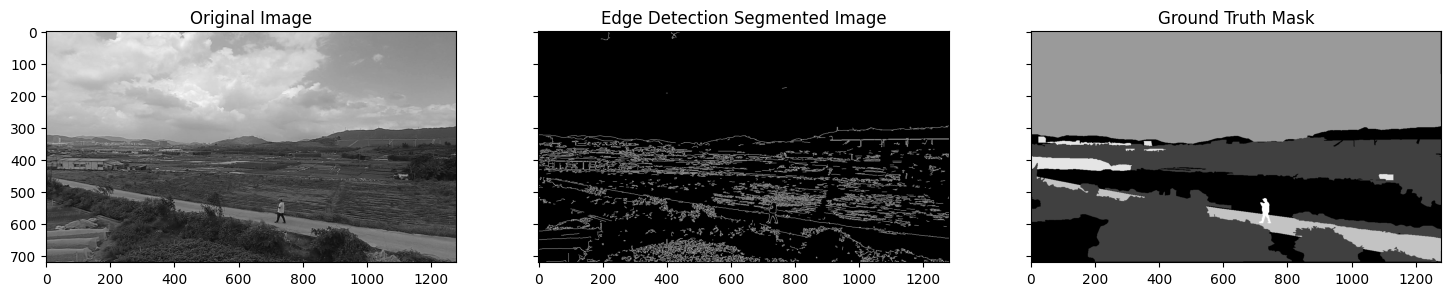

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.025045313179884978
Precision: 0.033440723674785476
Recall: 0.1659450954861111
F1 Score: 0.05566418019787901
Computational Efficiency (Time): 0.01 seconds
Confusion Matrix:
[[152935      0      0      0      0      0  21772]
 [251515      0      0      0      0      0  27864]
 [416513      0      0      0      0      0    563]
 [ 34416      0      0      0      0      0   1325]
 [ 10414      0      0      0      0      0   2818]
 [  1167      0      0      0      0      0    298]
 [     0      0      0      0      0      0      0]]


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load and read original image
original_img = cv.imread('ori_img3.jpg', cv.IMREAD_GRAYSCALE)

# Load ground truth mask (replace 'ground_truth_mask.jpg' with your actual ground truth mask image)
ground_truth_mask = cv.imread('ground_truth_mask3.png', cv.IMREAD_GRAYSCALE)

# Computational Efficiency
start_time = time.time()

aperture_size = 5 # Aperture size
L2Gradient = True # Boolean

# Apply Edge Detection Method - Canny on the original image
edges = cv.Canny(original_img, 100, 200, L2gradient=L2Gradient)

end_time = time.time()
elapsed_time = end_time - start_time

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

ax[0].imshow(original_img, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edge Detection Segmented Image')

ax[2].imshow(ground_truth_mask, cmap='gray')
ax[2].set_title('Ground Truth Mask')

plt.show()

# Calculate accuracy, precision, recall, and F1 score
intersection = cv.bitwise_and(edges, ground_truth_mask)
union = cv.bitwise_or(edges, ground_truth_mask)

accuracy = np.sum(intersection) / np.sum(union)
precision = precision_score(ground_truth_mask.flatten(), edges.flatten(), average='weighted')
recall = recall_score(ground_truth_mask.flatten(), edges.flatten(), average='weighted')
f1 = f1_score(ground_truth_mask.flatten(), edges.flatten(), average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"Computational Efficiency (Time): {elapsed_time:.2f} seconds")

# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truth_mask.flatten(), edges.flatten())
print("Confusion Matrix:")
print(conf_matrix)

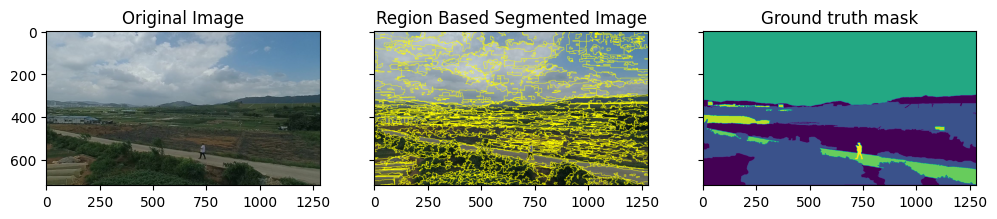

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.2267175235042446
Precision: 0.0007632928340603329
Recall: 1.5190972222222223e-05
F1 Score: 2.9789085260492272e-05
Computational Efficiency (Time): 5.47 seconds
Confusion Matrix:
[[    14 174693      0      0      0      0      0]
 [     0      0      0      0      0      0      0]
 [     0 279379      0      0      0      0      0]
 [  3463 413613      0      0      0      0      0]
 [     0  35741      0      0      0      0      0]
 [     0  13232      0      0      0      0      0]
 [     0   1465      0      0      0      0      0]]


In [ ]:
# Install scikit-image library
!pip install -U scikit-image

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, segmentation
import cv2 as cv
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time

# Load an image
image = io.imread('ori_img3.jpg')

# Load ground truth mask (replace 'ground_truth_mask.jpg' with your actual ground truth mask image)
ground_truth_mask = cv.imread('ground_truth_mask3.png', cv.IMREAD_GRAYSCALE)

# Computational Efficiency
start_time = time.time()

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Apply Felzenszwalb's algorithm for segmentation
segments_fz = segmentation.felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

# Post-process the segmentation result
segments_merge = segments_fz

end_time = time.time()
elapsed_time = end_time - start_time

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(segmentation.mark_boundaries(image, segments_merge))
ax[1].set_title('Region Based Segmented Image')

ax[2].imshow(ground_truth_mask)
ax[2].set_title('Ground truth mask')

plt.show()

# Calculate accuracy, precision, recall, and F1 score
# Assuming ground_truth_mask is binary (0 and 255) and segments_merge is integer-labeled
intersection = cv.bitwise_and((segments_merge > 0).astype(np.uint8) * 255, ground_truth_mask)
union = cv.bitwise_or((segments_merge > 0).astype(np.uint8) * 255, ground_truth_mask)

accuracy = np.sum(intersection) / np.sum(union)
precision = precision_score(ground_truth_mask.flatten(), (segments_merge > 0).astype(np.uint8).flatten(), average='weighted')
recall = recall_score(ground_truth_mask.flatten(), (segments_merge > 0).astype(np.uint8).flatten(), average='weighted')
f1 = f1_score(ground_truth_mask.flatten(), (segments_merge > 0).astype(np.uint8).flatten(), average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"Computational Efficiency (Time): {elapsed_time:.2f} seconds")

# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truth_mask.flatten(), (segments_merge > 0).astype(np.uint8).flatten())
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


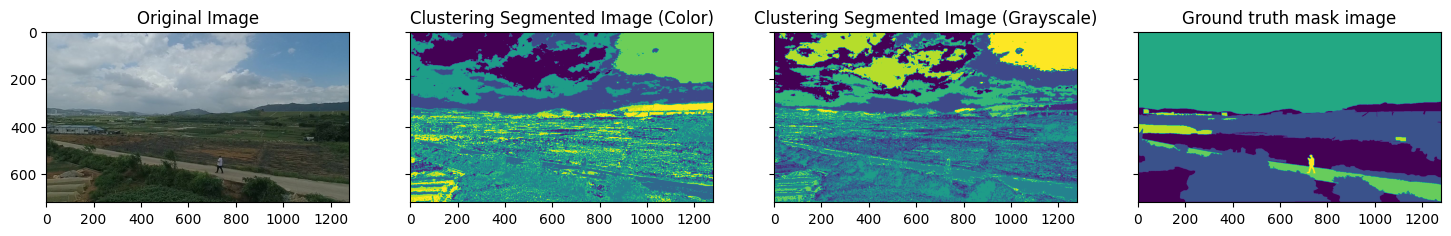

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.20333340774380612
Precision: 0.00034409587786602753
Recall: 0.00020290798611111112
F1 Score: 0.0002552808351271483
Computational Efficiency (Time): 18.23 seconds
Confusion Matrix:
[[   187 174520      0      0      0      0      0]
 [     0      0      0      0      0      0      0]
 [    34 279345      0      0      0      0      0]
 [102743 314333      0      0      0      0      0]
 [     0  35741      0      0      0      0      0]
 [    55  13177      0      0      0      0      0]
 [     3   1462      0      0      0      0      0]]


In [ ]:
# Install necessary libraries
!pip install -U scikit-learn
!pip install -U matplotlib

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.cluster import KMeans
import cv2 as cv
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time

# Load an image
image = io.imread('ori_img3.jpg')

# Load ground truth mask (replace 'ground_truth_mask.jpg' with your actual ground truth mask image)
ground_truth_mask = cv.imread('ground_truth_mask3.png', cv.IMREAD_GRAYSCALE)

# Computational Efficiency
start_time = time.time()

# Flatten the image into a 2D array (rows x columns, features)
pixels = np.reshape(image, (image.shape[0] * image.shape[1], image.shape[2]))

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Flatten the grayscale image
pixels_gray = np.reshape(image_gray, (image_gray.shape[0] * image_gray.shape[1], 1))

# Number of clusters (adjust as needed)
n_clusters = 10

# Apply k-means clustering to the color information
kmeans_color = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_color.fit(pixels)

# Apply k-means clustering to the grayscale information
kmeans_gray = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_gray.fit(pixels_gray)

# Assign labels to each pixel
labels_color = kmeans_color.labels_
labels_gray = kmeans_gray.labels_

# Reshape the labels to the original image shape
segmented_color = np.reshape(labels_color, (image.shape[0], image.shape[1]))
segmented_gray = np.reshape(labels_gray, (image_gray.shape[0], image_gray.shape[1]))

end_time = time.time()
elapsed_time = end_time - start_time

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(segmented_color, cmap='viridis')
ax[1].set_title('Clustering Segmented Image (Color)')

ax[2].imshow(segmented_gray, cmap='viridis')
ax[2].set_title('Clustering Segmented Image (Grayscale)')

ax[3].imshow(ground_truth_mask, cmap='viridis')
ax[3].set_title('Ground truth mask image')

plt.show()

# Calculate accuracy, precision, recall, and F1 score
# Assuming ground_truth_mask is binary (0 and 255) and segments_merge is integer-labeled
intersection = cv.bitwise_and((segmented_gray > 0).astype(np.uint8) * 255, ground_truth_mask)
union = cv.bitwise_or((segmented_gray > 0).astype(np.uint8) * 255, ground_truth_mask)

accuracy = np.sum(intersection) / np.sum(union)
precision = precision_score(ground_truth_mask.flatten(), (segmented_gray > 0).astype(np.uint8).flatten(), average='weighted')
recall = recall_score(ground_truth_mask.flatten(), (segmented_gray > 0).astype(np.uint8).flatten(), average='weighted')
f1 = f1_score(ground_truth_mask.flatten(), (segmented_gray > 0).astype(np.uint8).flatten(), average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"Computational Efficiency (Time): {elapsed_time:.2f} seconds")

# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truth_mask.flatten(), (segmented_gray > 0).astype(np.uint8).flatten())
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
from sklearn.metrics import silhouette_score
import time

# Assuming 'pixels' contains flattened pixel values
# 'labels_color' and 'labels_gray' contain the cluster labels from k-means clustering

# Silhouette Score
silhouette_color = silhouette_score(pixels, labels_color)
silhouette_gray = silhouette_score(pixels_gray, labels_gray)

print(f"Silhouette Score (Color): {silhouette_color:.2f}")
print(f"Silhouette Score (Grayscale): {silhouette_gray:.2f}")

# Computational Efficiency
start_time = time.time()

# Your k-means clustering code here

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Computational Efficiency (Time): {elapsed_time:.2f} seconds")